In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.32


In [3]:
def build(robot):
    box1=Box(robot,x=3,y=9.5,name="right")
    box2=Box(robot,x=3,y=11.5,name="left")    
    
    connect(box1,box2,"weld")
    
    disk1=Disk(robot,x=2,y=10.5,name="center")
    
    connect(disk1,box1,"distance")
    connect(disk1,box2,"distance")    

In [7]:
def act(t,robot):
    
    distance=robot['center'].read_distance()
    
    if t<0.5:
        robot['center'].τ=0.1
    else:
        robot['center'].τ=0.0
    
    robot.storage += t,distance
    
    robot.message=distance

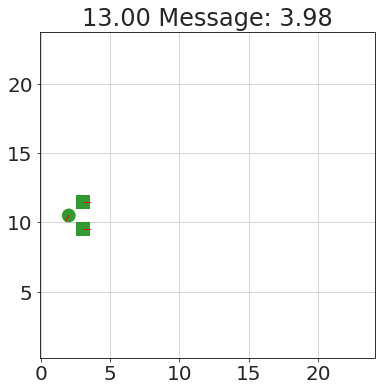

In [8]:
env=Environment(24,24)
robot=Robot(env)
build(robot)

run_sim(env,act,
        figure_width=6,
       total_time=13,
       dt_display=0.3,  # make this larger for a faster display
       )

In [9]:
t,distance=robot.storage.arrays()

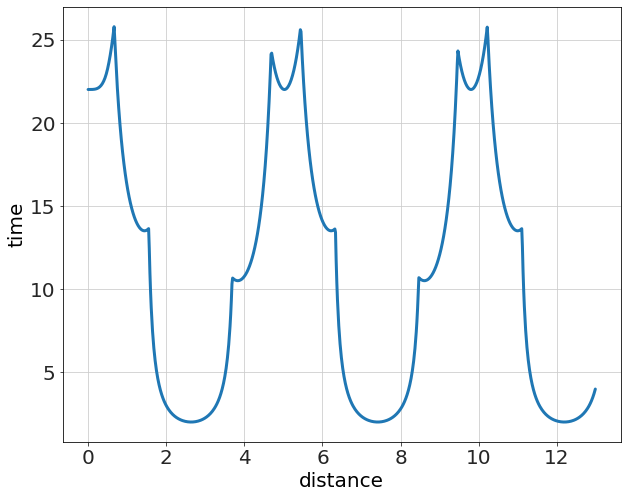

In [14]:
plot(t,distance)
xlabel("distance")
ylabel("time")
savefig("/Users/bblais/Desktop/test.png", transparent=True)